In [291]:
# Import required libraries into the jupyter notebook

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from sqlite3 import connect
conn = connect(':memory:')


# Beginning Code blocks to do the things I want it to do

In [292]:
# Step to read in weather data and pizza data csv files from the data directory
weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)
pizza_file = pd.read_csv("data/alexandria_pizza_data.csv", low_memory=False)

# Reading in a second 'golden' copy that can be used for basic calculations with original numbers
gold_weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)

In [293]:
# Display head of weather file to show successful read of file
weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,42,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,33,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,44,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,41,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,35,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [294]:
# Diesply head of pizza date file to show successful read of file
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,OrdVoidDate,OrdTaxExemptID,OrdOnlineOrderID,PmtType
0,3/1/2021,Monday,3,19.60,1,NaN,NaN,NaN,3
1,3/1/2021,Monday,2,20.74,3,NaN,NaN,NaN,3
2,3/1/2021,Monday,5,20.97,1,NaN,NaN,NaN,3
3,3/1/2021,Monday,6,9.99,1,NaN,NaN,NaN,3
4,3/1/2021,Monday,10,26.27,1,NaN,NaN,NaN,3


In [295]:
# Adding step to round values for early basic calculations
gold_weather_file.temp = gold_weather_file.temp.round(-1) 
gold_weather_file.precip = gold_weather_file.precip.round(2)

# Add stepto temp and precip values to allow for better visualization
weather_file.temp = weather_file.temp * 20
weather_file.precip = weather_file.precip * 2000

weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,840,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,660,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,880,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,820,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,700,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [296]:
# Cleaning data ahead of the merge since there were column warnings above

pizza_file.drop(['OrdVoidDate', 'OrdTaxExemptID', 'OrdOnlineOrderID', 'PmtType'],axis=1,inplace=True)
weather_file.drop(['name', 'icon', 'stations', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description'],axis=1,inplace=True)

pizza_file
#pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,3/1/2021,Monday,3,19.60,1
1,3/1/2021,Monday,2,20.74,3
2,3/1/2021,Monday,5,20.97,1
3,3/1/2021,Monday,6,9.99,1
4,3/1/2021,Monday,10,26.27,1
...,...,...,...,...,...
93481,10/31/2023,Tuesday,173,10.49,1
93482,10/31/2023,Tuesday,25,64.69,1
93483,10/31/2023,Tuesday,122,23.98,1
93484,10/31/2023,Tuesday,155,19.98,1


In [298]:
weather_file.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions
0,2021-03-01,55,32,840,55.0,23.9,35.3,28.8,62.0,62.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy"
1,2021-03-02,44,24,660,44.4,16.6,28.6,16.5,52.2,0.0,...,8.9,49.6,1026.0,0.5,9.9,197.2,17.1,7,NaN,Clear
2,2021-03-03,62,27,880,62.1,22.7,42.2,26.6,54.2,0.0,...,13.6,232.9,1017.5,0.0,9.9,194.3,16.6,7,NaN,Clear
3,2021-03-04,52,30,820,51.9,23.2,36.7,25.9,57.3,0.0,...,16.4,358.6,1021.9,1.3,9.9,197.0,16.9,7,NaN,Clear
4,2021-03-05,47,25,700,42.2,18.4,31.0,18.9,54.5,0.0,...,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN,Clear


In [ ]:
gold_weather_file.head()

In [297]:
#Changing date columns to be in format compatible with matplotlib
pizza_file['BusDate'] = pd.to_datetime(pizza_file['BusDate'])
weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])
pizza_file

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,2021-03-01,Monday,3,19.60,1
1,2021-03-01,Monday,2,20.74,3
2,2021-03-01,Monday,5,20.97,1
3,2021-03-01,Monday,6,9.99,1
4,2021-03-01,Monday,10,26.27,1
...,...,...,...,...,...
93481,2023-10-31,Tuesday,173,10.49,1
93482,2023-10-31,Tuesday,25,64.69,1
93483,2023-10-31,Tuesday,122,23.98,1
93484,2023-10-31,Tuesday,155,19.98,1


In [299]:
# Joining both files into one data element to begin analysis
#left = pizza_file.set_index('BusDate')
#right = weather_file.set_index('datetime')
#combined_dataset = left.join(right, lsuffix='_p', rsuffix="_w")

gold_combined_dataset = pizza_file.merge(gold_weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))
combined_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))
# Adding the daily sum total to the dataframe to allow for visualization
combined_dataset['DailySum'] = combined_dataset.groupby('BusDate')['OtotSubTotal'].transform('sum')


#Reading dataframe into SQL
combined_dataset.to_sql(name='combined_db', con=conn)
pizza_file.to_sql(name='pizza_db', con=conn)
weather_file.to_sql(name='weather_db', con=conn)

# Displaying combined dataset to ensure it created properly
combined_dataset.head()



,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,DailySum
0,2021-03-01,Monday,3,19.60,1,2021-03-01,55,32,840,55.0,...,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy",1416.76
1,2021-03-01,Monday,2,20.74,3,2021-03-01,55,32,840,55.0,...,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy",1416.76
2,2021-03-01,Monday,5,20.97,1,2021-03-01,55,32,840,55.0,...,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy",1416.76
3,2021-03-01,Monday,6,9.99,1,2021-03-01,55,32,840,55.0,...,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy",1416.76
4,2021-03-01,Monday,10,26.27,1,2021-03-01,55,32,840,55.0,...,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,"Rain, Partially cloudy",1416.76


In [305]:
# This cell will be used to try to sample the data and show various counts

orders_per_day = combined_dataset.DayofWeek.value_counts()
orders_per_day

DayofWeek
Friday       20113
Saturday     18462
Sunday       13451
Thursday     11603
Wednesday    10712
Tuesday       9945
Monday        9200
Name: count, dtype: int64

<Axes: xlabel='DayofWeek'>

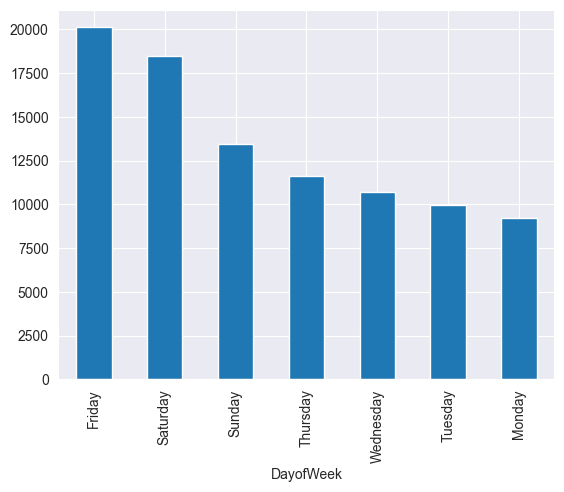

In [332]:
# First visualizations from the dataframes I have created
# First up is orders per day. 
orders_per_day.plot(kind='bar')

In [301]:
# This cell will be used to try to sample the data and show various counts

orders_per_avgtemp = gold_combined_dataset.temp.value_counts()
orders_per_avgtemp

temp
 1380    3611
 1420    3323
 1400    2970
 1460    2969
 1520    2879
         ... 
 300      204
 280      124
-20        76
 420       58
 460       56
Name: count, Length: 69, dtype: int64

In [ ]:
orders_per_avgtemp.plot(kind="bar")

In [302]:
orders_per_precip = gold_combined_dataset.precip.value_counts()
orders_per_precip.to_csv("data/OrdersPrecip.csv")
orders_per_precip

precip
0.0       54129
4.0        1589
12.0       1389
32.0        877
16.0        858
          ...  
322.0        55
1052.0       53
724.0        53
1078.0       53
1688.0       50
Name: count, Length: 246, dtype: int64

In [306]:
# Steps to create dataframes for weekend and M-Th pizza sales 

#First, limiting the columns being selected
limited_dataset = combined_dataset[["BusDate", "DayofWeek", "DailySum", "temp"]]

# Weekend
friday_select = (limited_dataset.DayofWeek == 'Friday')
friday_orders = limited_dataset[friday_select]
saturday_select = (limited_dataset.DayofWeek == 'Saturday')
saturday_orders = limited_dataset[saturday_select]
sunday_select = (limited_dataset.DayofWeek == 'Sunday')
sunday_orders = limited_dataset[sunday_select]
weekend_orders = pd.concat([friday_orders, saturday_orders, sunday_orders])

# Weekday
monday_select = (limited_dataset.DayofWeek == "Monday")
monday_orders = limited_dataset[monday_select]
tuesday_select = (limited_dataset.DayofWeek == "Tuesday")
tuesday_orders = limited_dataset[tuesday_select]
wednesday_select = (limited_dataset.DayofWeek == "Wednesday")
wednesday_orders = limited_dataset[wednesday_select]
thursday_select = (limited_dataset.DayofWeek == "Thursday")
thursday_orders = limited_dataset[thursday_select]
montues_orders = pd.concat([monday_orders, tuesday_orders])
weekday_orders = pd.concat([monday_orders, tuesday_orders, wednesday_orders, thursday_orders])


friday_orders

,BusDate,DayofWeek,DailySum,temp
267,2021-03-05,Friday,3077.16,700
268,2021-03-05,Friday,3077.16,700
269,2021-03-05,Friday,3077.16,700
270,2021-03-05,Friday,3077.16,700
271,2021-03-05,Friday,3077.16,700
...,...,...,...,...
92990,2023-10-27,Friday,4702.10,1340
92991,2023-10-27,Friday,4702.10,1340
92992,2023-10-27,Friday,4702.10,1340
92993,2023-10-27,Friday,4702.10,1340


<Axes: >

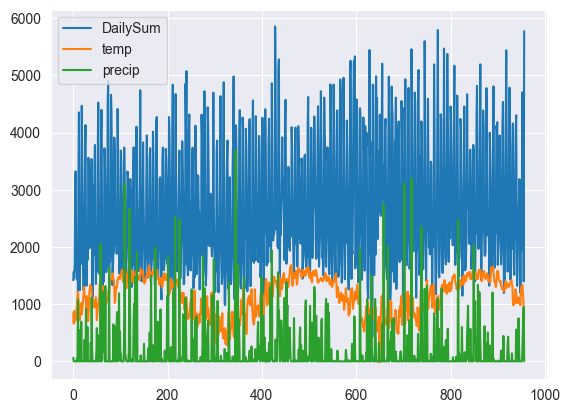

In [326]:
daily_sales_df = pd.read_sql('select distinct BusDate, DailySum, temp, precip from combined_db', conn)
daily_sales_df.plot()

<Axes: xlabel='BusDate'>

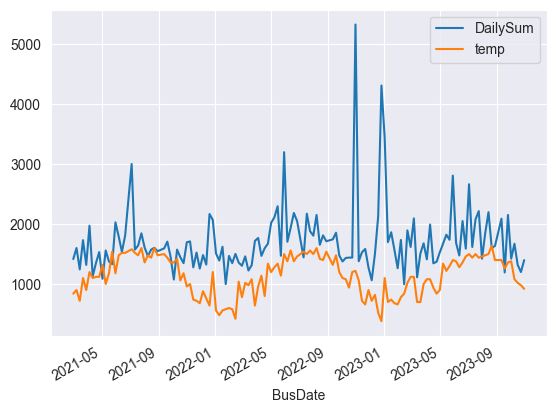

In [307]:
monday_orders.plot(x="BusDate", kind="line")

<Axes: xlabel='BusDate'>

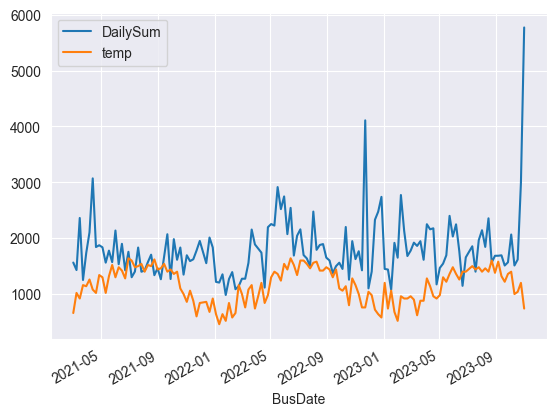

In [308]:
tuesday_orders.plot(x="BusDate", kind="line")

<Axes: xlabel='BusDate'>

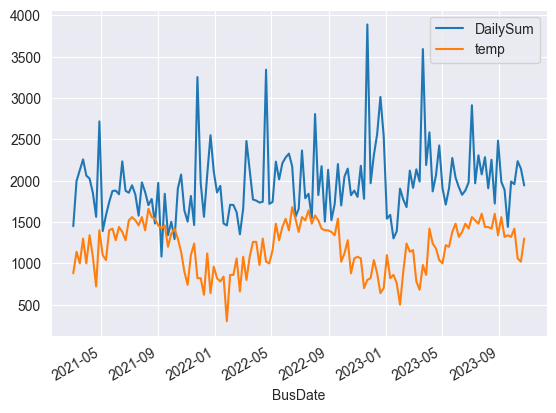

In [309]:
wednesday_orders.plot(x="BusDate", kind="line")

<Axes: xlabel='BusDate'>

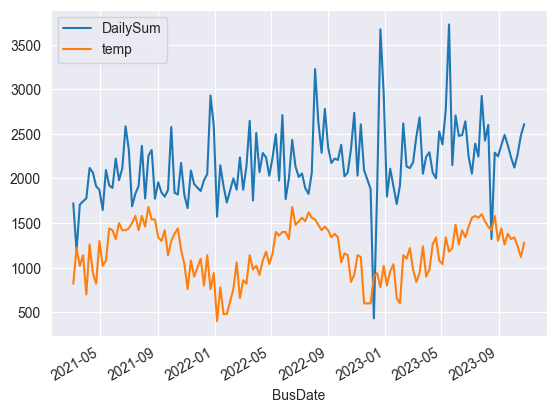

In [310]:
thursday_orders.plot(x="BusDate", kind="line")

<Axes: xlabel='BusDate'>

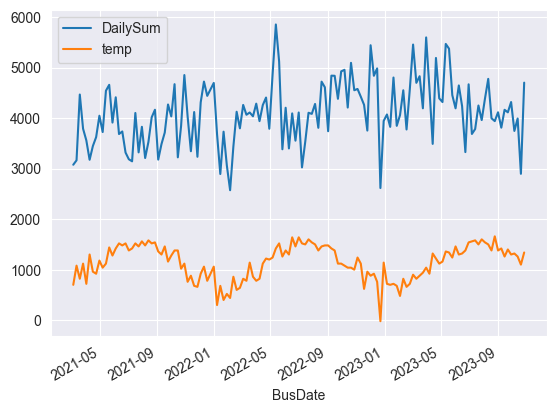

In [311]:
friday_orders.plot(x="BusDate", kind="line")

<Axes: xlabel='BusDate'>

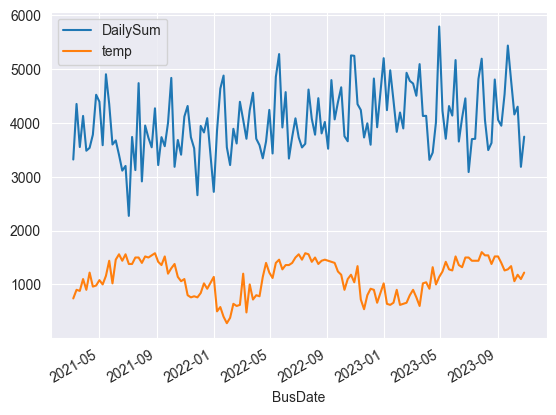

In [312]:
saturday_orders.plot(x="BusDate", kind="line")

<Axes: xlabel='BusDate'>

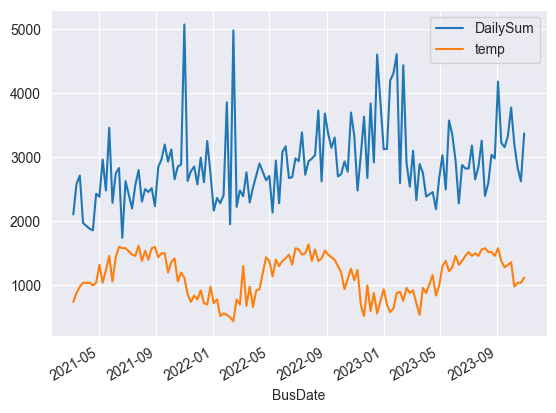

In [313]:
sunday_orders.plot(x="BusDate", kind="line")

In [314]:
weekend_orders

,BusDate,DayofWeek,DailySum,temp
267,2021-03-05,Friday,3077.16,700
268,2021-03-05,Friday,3077.16,700
269,2021-03-05,Friday,3077.16,700
270,2021-03-05,Friday,3077.16,700
271,2021-03-05,Friday,3077.16,700
...,...,...,...,...
93243,2023-10-29,Sunday,3372.77,1120
93244,2023-10-29,Sunday,3372.77,1120
93245,2023-10-29,Sunday,3372.77,1120
93246,2023-10-29,Sunday,3372.77,1120


In [315]:
weekday_orders

,BusDate,DayofWeek,DailySum,temp
0,2021-03-01,Monday,1416.76,840
1,2021-03-01,Monday,1416.76,840
2,2021-03-01,Monday,1416.76,840
3,2021-03-01,Monday,1416.76,840
4,2021-03-01,Monday,1416.76,840
...,...,...,...,...
92834,2023-10-26,Thursday,2609.50,1280
92835,2023-10-26,Thursday,2609.50,1280
92836,2023-10-26,Thursday,2609.50,1280
92837,2023-10-26,Thursday,2609.50,1280


# Appendix

## Items below this line are being retained for information purposes only

<Axes: xlabel='BusDate'>

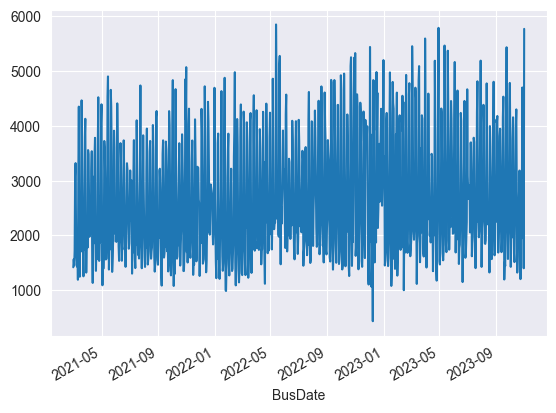

In [325]:
# Trying to sum transactions for the day to eventually show sales per day in a line graph

#combined_dataset.groupby('OtotSubTotal').max()
sales_total_day = combined_dataset.groupby('BusDate')['OtotSubTotal'].sum()
sales_total_day.plot()


<Axes: >

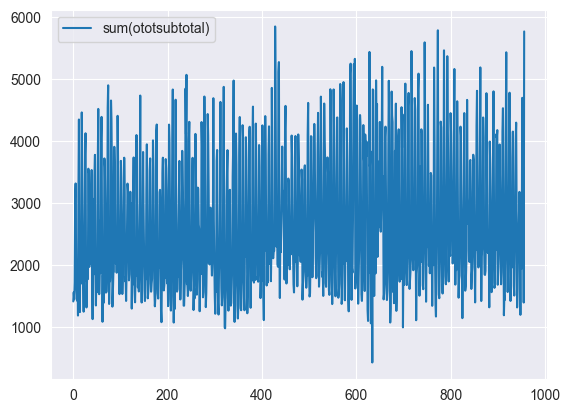

In [333]:
# Same as the cell above, only using DB commands instead of python
sales_df = pd.read_sql('select busdate, sum(ototsubtotal) from pizza_db group by busdate', conn)
sales_df.plot()

<Axes: >

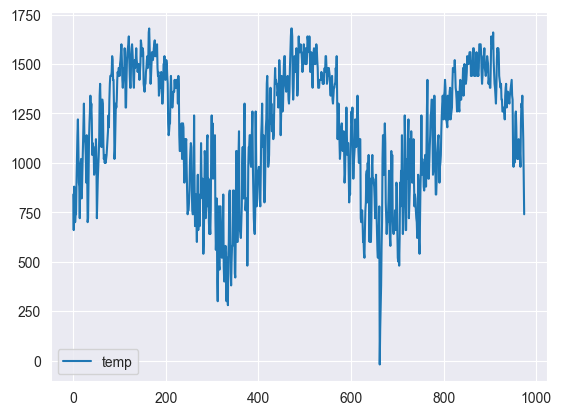

In [328]:
db_df = pd.read_sql('select datetime, temp from weather_db', conn)
db_df.plot()

In [300]:
# Creating a dataset to use for correlation
corr_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime')
corr_dataset.drop(['DayofWeek','conditions','preciptype'],axis=1,inplace=True)

corr_dataset.head()

,BusDate,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,2021-03-01,3,19.60,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,2021-03-01,2,20.74,3,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
2,2021-03-01,5,20.97,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
3,2021-03-01,6,9.99,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
4,2021-03-01,10,26.27,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN


In [317]:
# Correlation matrix for the combined dataframe

print(corr_dataset.corr())

corr_output = corr_dataset.corr()

# corr_output.to_csv("data/CorrResults.csv")  # Commenting this out since it is no longer required.
#corr_matrix

#Correlation matrix first try did not work - need to dig into previous class examples and find this to see if I can figure this out. Ending for the day
# Second try got closer - maybe try removing the dayofthe week column and try that.
# Third try worked by removing the columns with words

 #Working thoughts - What does order type/money spent tell us?, What about rounding precip and seeing number of orders based on amount of precip
 # Trend seems to show that the more it rains, the less people order pizza

                   BusDate   OrderID  OtotSubTotal  OrdServiceType  datetime  \
BusDate           1.000000  0.015641      0.066150        0.046592  1.000000   
OrderID           0.015641  1.000000     -0.023917       -0.021448  0.015641   
OtotSubTotal      0.066150 -0.023917      1.000000       -0.119115  0.066150   
OrdServiceType    0.046592 -0.021448     -0.119115        1.000000  0.046592   
datetime          1.000000  0.015641      0.066150        0.046592  1.000000   
tempmax           0.055622 -0.027196     -0.005950       -0.013141  0.055622   
tempmin           0.041289 -0.025703     -0.009350       -0.013401  0.041289   
temp              0.048418 -0.026760     -0.007559       -0.013284  0.048418   
feelslikemax      0.045923 -0.027417     -0.007108       -0.012938  0.045923   
feelslikemin      0.041461 -0.027392     -0.009434       -0.013844  0.041461   
feelslike         0.045547 -0.028333     -0.008123       -0.013236  0.045547   
dew               0.055314 -0.022437    

In [318]:
corr_dataset.head()

,BusDate,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,2021-03-01,3,19.60,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,2021-03-01,2,20.74,3,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
2,2021-03-01,5,20.97,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
3,2021-03-01,6,9.99,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
4,2021-03-01,10,26.27,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN


<Axes: >

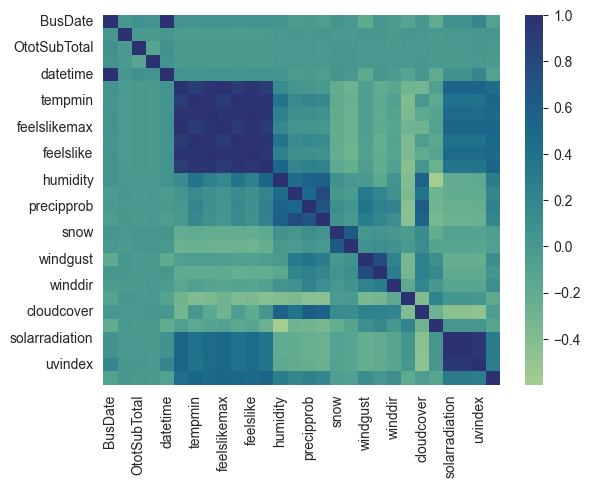

In [322]:
sns.heatmap(corr_output, cmap='crest')

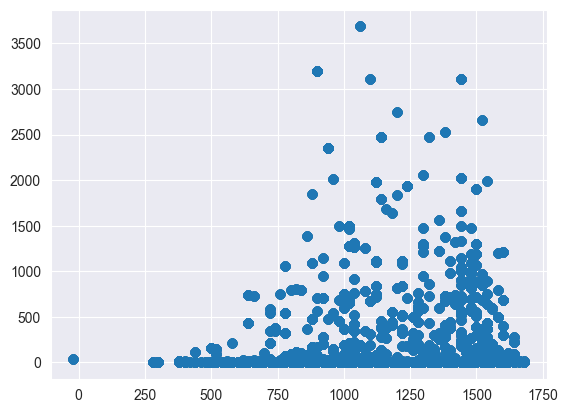

In [320]:
x=combined_dataset["temp"]
y=combined_dataset["precip"]
plt.scatter(x,y)

In [316]:
##Calculations here are no longer valid since the temperature value was multiplied and rounded differently

# Checking the correlation of temperature on Weekend days

#fri_orders_per_avgtemp = friday_orders.temp.value_counts()
#fri_orders_per_avgtemp

montues_orders_per_avgtemp = montues_orders.temp.value_counts().rename("numcount")
montues_orders_per_avgtemp

temp
1400    947
1500    818
1480    775
1360    769
1440    689
1200    580
1540    506
1600    504
1080    503
960     478
740     447
1000    446
1100    428
1300    426
920     421
1460    421
1520    414
1340    385
1020    377
1140    363
1420    358
1220    355
640     353
1280    349
1380    344
840     342
980     320
900     308
760     303
1060    301
720     287
680     285
1320    268
880     268
1580    258
1120    257
1160    255
580     251
1640    251
660     243
1560    223
1180    205
1260    202
520     183
700     163
1040    161
860     142
600     141
380     138
780     128
560     121
800     116
940     108
620      80
1240     78
820      67
1620     62
480      60
420      58
460      56
Name: numcount, dtype: int64

In [321]:
# Weekday
#monday_select = (combined_dataset.DayofWeek == "Monday")
#monday_orders = combined_dataset[monday_select]
#tuesday_select = (combined_dataset.DayofWeek == "Tuesday")
#tuesday_orders = combined_dataset[tuesday_select]
#wednesday_select = (combined_dataset.DayofWeek == "Wednesday")
##wednesday_orders = combined_dataset[wednesday_select]
#thursday_select = (combined_dataset.DayofWeek == "Thursday")
#thursday_orders = combined_dataset[thursday_select]
#montues_orders = pd.concat([monday_orders, tuesday_orders])
#weekday_orders = pd.concat([monday_orders, tuesday_orders, wednesday_orders, thursday_orders])


# stopping point for today - need to setup dataframe to hold columns of information I want to visualize - 7 wide bar chart for pizza sales per precipitation
# or pizza sales per temperature - probably both.

In [ ]:
# Another way to graph the daily line graphs, but determined I did not need it
#tuesday_orders_graph = tuesday_orders[["DailySum","temp"]]
#tuesday_orders_graph.plot()